In [117]:
import json
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [119]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [120]:
#IEX_TOKEN = os.getenv('IEX_TOKEN')
#IEX_TOKEN_PUB = os.getenv('IEX_TOKEN_PUB')
#type(IEX_TOKEN)

#=IMPORTDATA("https://cloud.iexapis.com/stable/stock/aapl/quote/latestPrice?token=YOUR_TOKEN_HERE")

list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for `SPY` and `AGG`
df = get_historical_data(list_of_tickers, start_date, end_date, close_only=True,  output_format='pandas')
df.drop(columns='volume',level=1,inplace=True)
df.head()



,SPY,AGG
,close,close
date,,
2018-10-01,291.73,105.24
2018-10-02,291.56,105.36
2018-10-03,291.72,104.86
2018-10-04,289.44,104.56
2018-10-05,287.82,104.33


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [121]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns=df.pct_change().dropna() 
daily_returns.head()


,SPY,AGG
,close,close
date,,
2018-10-02,-0.000583,0.001140
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861
2018-10-05,-0.005597,-0.002200
2018-10-08,0.000000,-0.000383


In [122]:
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
print(avg_daily_return_spy)
print(avg_daily_return_agg)


7.685278606169602e-05
0.00028962014860420526


In [123]:
# Calculate volatility
# YOUR CODE HERE

std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
print(std_dev_daily_return_spy)
print(std_dev_daily_return_agg)


0.010623738968815176
0.001956292025762804


In [124]:
# Save the last day's closing price
# YOUR CODE HERE
last_day=df.tail(1)
last_day
SPY_last_price = df['SPY']['close'][-1]
AGG_last_price = df['AGG']['close'][-1]
print(SPY_last_price)
print(AGG_last_price)

293.24
113.12


In [125]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
#monte_carlo = pd.DataFrame()

In [126]:
# Run the Monte Carlo Simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()
for x in range(number_simulations):
    simulated_spy_prices = [SPY_last_price]
    simulated_agg_prices = [AGG_last_price]    
    # Simulate the returns for 252 * 30 years
    for i in range(number_records):        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.6, 0.4]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003220,0.993711,0.990539,0.998603,1.006113,1.009203,1.012360,0.993488,1.001864,0.998711,...,1.000611,1.001794,0.993246,1.001678,0.990270,0.996360,1.010796,1.011501,1.009137,1.012448
2,1.008720,0.998115,0.988707,0.997422,1.010189,0.996421,1.004568,0.979164,1.000316,1.009768,...,0.995367,1.005942,0.984125,0.995487,0.988729,0.990433,1.002094,1.012605,1.007018,1.016913
3,1.007193,0.997715,0.992942,0.988988,1.008942,1.000584,1.009005,0.971078,0.999525,1.019727,...,1.002221,1.002214,0.974909,1.001499,0.984516,0.991211,0.995172,1.013328,1.008449,1.026203
4,1.018100,1.000957,0.987280,0.995989,1.010024,0.993078,1.006449,0.967335,1.009555,1.005091,...,1.008487,0.999545,0.973432,1.006259,0.975622,0.993799,0.983787,1.014538,1.012610,1.020047


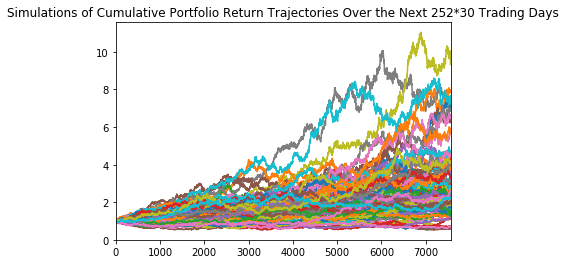

In [127]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = "Simulations of Cumulative Portfolio Return Trajectories Over the Next 252*30 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [128]:
simulated_price_df.head(6)

,SPY prices,AGG prices
0,293.240000,113.120000
1,299.095605,113.252068
2,300.995774,113.421499
3,305.721782,113.340639
4,302.749979,113.293331
5,302.226971,113.221425


In [129]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.tail()


95    2.048890
96    2.579427
97    4.155199
98    4.077560
99    2.269338
Name: 7560, dtype: float64

In [130]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns_20 = portfolio_cumulative_returns.iloc[252*20, :]
ending_cumulative_returns_20.head()

0    1.733198
1    2.004228
2    1.439973
3    2.319265
4    2.576074
Name: 5040, dtype: float64

In [131]:
# Display the 90% confidence interval for the ending returns for the 30 years 
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    1.084310
0.95    6.632729
Name: 7560, dtype: float64

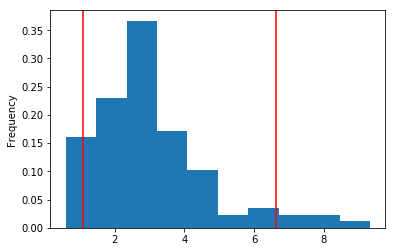

In [132]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [161]:
# YOUR CODE HERE
##ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns) #?
relevant_percentiles=ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.9])
relevant_percentiles

0.1    1.289466
0.5    2.755764
0.9    4.824329
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [162]:
# YOUR CODE HERE

initial_investment = 20000

expected_port_return_10=initial_investment*relevant_percentiles.iloc[0];
expected_port_return_50=initial_investment*relevant_percentiles.iloc[1];
expected_port_return_90=initial_investment*relevant_percentiles.iloc[2];
print(round(expected_port_return_10,0))
print(round(expected_port_return_50,0))
print(round(expected_port_return_90,0))


25789.0
55115.0
96487.0


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [136]:
# YOUR CODE HERE
ret_port=(initial_investment+expected_port_return_10)*0.04
print(ret_port)

projected_yearly_income_before_tax=7389

if ret_port > projected_yearly_income_before_tax:
    print('Retirement portfolio exceed the value at the the 10th percentile')
else:
    print('Retirement portfolio does not meet the value at the the 10th percentile')



1831.5728
Retirement portfolio does not meet the value at the the 10th percentile


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [116]:
# YOUR CODE HERE

ret_port2=(initial_investment*1.5+expected_port_return_10*1.5)*0.04
print(ret_port2)

if ret_port > projected_yearly_income_before_tax:
    print('Retirement portfolio exceed the value at the the 10th percentile')
else:
    print('Retirement portfolio does not meet the value at the the 10th percentile')

3616.6332
Retirement portfolio does not meet the value at the the 10th percentile


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE